## Práctica 8: Árboles. Parte 1

**Objetivos:** Conocer e identificar las características de la estructura no lineal árbol.

**Actividades:** • Implementar la estructura de datos árbol binario así como su recorrido infijo, prefijo y sufijo en lenguaje Python. 

**Instrucciones:**
- Modelar la clase nodo y la clase árbol binario e implementalos en lenguaje Python. La clase árbol binario debe tener los métodos: insertar, buscar, eliminar, mínimo, máximo, recorrido inorden, recorrido preorden y recorrido posorden
- Obtener el polinomio y la complejidad algorítmica de los algoritmos de insertar, buscar, eliminar, mínimo, máximo, recorrido inorden, recorrido preorden y
recorrido posorden en un árbol binario.
- Crear las gráficas de la complejidad que tienen los algoritmos de insertar, buscar, eliminar, mínimo, máximo, recorrido inorden, recorrido preorden y recorrido
posorden en un árbol binario para el peor caso de complejidad.

In [1]:
import matplotlib.pyplot as plt
import random

C R E A C I Ó N _ D E L _ N O D O

In [2]:
class Node:
    def __init__(self, key, value = 0, name =""):
        self.left = None
        self.right = None
        self.key = key 
        self.value = value 
        self.name = name 
        
    def __str__(self):
        return str(self.key) + " -> " + self.name

C R E A C I Ó N _ D E L _ Á R B O L

In [3]:
class BinaryTree:
    root = None  # El árbol binario inicia con una raíz vacía.
    
    def insert(self, root, n):
        global contInsert 
        #contInsert += 1
        # Inserta un nodo n en el árbol binario de búsqueda de acuerdo a su valor clave (key).
        if root is None:
            self.root = n  # Si el árbol está vacío, el nodo n será la nueva raíz.
            return 
        
        # Si la clave del nodo n es menor que la clave de la raíz actual:
        if n.key < root.key:
            if root.left is None:  # Si no hay hijo izquierdo, coloca el nuevo nodo aquí.
                root.left = n
            else:  # Si ya hay un hijo izquierdo, se sigue descendiendo por la izquierda.
                self.insert(root.left, n)
        # Si la clave del nodo n es mayor que la clave de la raíz actual:
        elif n.key > root.key:
            if root.right is None:  # Si no hay hijo derecho, coloca el nuevo nodo aquí.
                root.right = n
            else:  # Si ya hay un hijo derecho, se sigue descendiendo por la derecha.
                self.insert(root.right, n)
                
    def search(self, root, key):
        global contSearch
        contSearch += 1 
        # Busca un nodo con una clave específica (key) en el árbol.
        if root is None:
            return None  # Si no encuentra el nodo, regresa None.
        
        if root.key == key:
            return root.key  # Si encuentra el nodo con la clave, lo devuelve.
        else:
            # Si la clave buscada es menor, busca en el subárbol izquierdo.
            if key < root.key:
                return self.search(root.left, key)
            else:  # Si la clave buscada es mayor, busca en el subárbol derecho.
                return self.search(root.right, key)
            
    def min(self, root):
        global contMin 
        #contMin += 1
        # Encuentra el nodo con la clave mínima en el árbol.
        if root is None:
            return None  # Si el árbol está vacío, regresa None.
        
        if root.left is None:
            return root  # Si no hay más hijos izquierdos, este es el nodo mínimo.
        return self.min(root.left)  # Continúa buscando en la izquierda.
    
    def max(self, root):
        global contMax
        #contMax += 1
        # Encuentra el nodo con la clave máxima en el árbol.
        if root is None:
            return None  # Si el árbol está vacío, regresa None.
        
        if root.right is None:
            return root  # Si no hay más hijos derechos, este es el nodo máximo.
        
        return self.max(root.right)  # Continúa buscando en la derecha.
    
    def delete(self, root, key):
        global contDelete
        #contDelete += 1
        # Elimina un nodo con una clave específica del árbol.
        if root is None:
            return None  # Si no encuentra el nodo, regresa None.
        
        # Si la clave a eliminar es menor, busca en el subárbol izquierdo.
        if key < root.key:
            root.left = self.delete(root.left, key)
        # Si la clave a eliminar es mayor, busca en el subárbol derecho.
        elif key > root.key:
            root.right = self.delete(root.right, key)
        else:
            # Caso 1: Si el nodo no tiene hijo izquierdo.
            if root.left is None:
                temp = root.right
                root = None  # Elimina el nodo.
                return temp  # Retorna el subárbol derecho.
            # Caso 2: Si el nodo no tiene hijo derecho.
            elif root.right is None:
                temp = root.left
                root = None  # Elimina el nodo.
                return temp  # Retorna el subárbol izquierdo.
            
            # Caso 3: Si el nodo tiene dos hijos, encuentra el sucesor mínimo en el subárbol derecho.
            temp = self.min(root.right)
            root.key = temp.key  # Reemplaza la clave del nodo con la clave mínima.
            # Elimina el sucesor mínimo en el subárbol derecho.
            root.right = self.delete(root.right, temp.key)
        return root  # Retorna la nueva raíz del subárbol modificado.
    
    def print_in(self, root, level):
        global contInorder
        # Imprime el árbol en orden in-order con tabulación para representar niveles.
        if root is not None:
            contInorder += 1
            self.print_in(root.left, level + 1)  # Primero recorre el subárbol izquierdo.
            print("\t"*level, root)  # Luego imprime el nodo actual con el nivel indicado.
            self.print_in(root.right, level + 1)  # Finalmente recorre el subárbol derecho.
    
    
    def print_pre(self, root):
        global contPreorder   
        # Imprime el árbol en orden pre-order (raíz, izquierda, derecha).
        if root is not None:
            contPreorder += 1 
            print(root)  # Primero imprime la raíz.
            self.print_pre(root.left)  # Luego recorre el subárbol izquierdo.
            self.print_pre(root.right)  # Finalmente recorre el subárbol derecho.

    
    def print_post(self, root):
        global contPostorder 
        # Imprime el árbol en orden post-order (izquierda, derecha, raíz).
        if root is not None:
            contPostorder += 1  
            self.print_post(root.left)  # Primero recorre el subárbol izquierdo.
            self.print_post(root.right)  # Luego recorre el subárbol derecho.
            print(root)  # Finalmente imprime la raíz.



P O L I N O M I O _ I N F I J O 

    def print_in(self, root, level):                        # P e o r  c a s o
            if root is not None:                            # 4
                self.print_in(root.left, level + 1)         # 6 * n
                print("\t"*level, root)                     # 4
                self.print_in(root.right, level + 1)        # 6 * n
                                                            # 12n + 8

    def print_in(self, root, level):                        # M e j o r  c a s o
            if root is not None:                            # 4
                self.print_in(root.left, level + 1)         # 6 * n
                print("\t"*level, root)                     # 4
                self.print_in(root.right, level + 1)        # 6 * n
                                                            # 12n + 8

    def print_in(self, root, level):                        # P r o m e d i o  c a s o
            if root is not None:                            # 4
                self.print_in(root.left, level + 1)         # 6 * n
                print("\t"*level, root)                     # 4
                self.print_in(root.right, level + 1)        # 6 * n
                                                            # 12n + 8

P O L I N O M I O _ P R E F I J O

    def print_pre(self, root):                                  # P E O R  C A S O
        if root is not None:                                    # 4
            print(root)                                         # 2
            self.print_pre(root.left)                           # 4 * n
            self.print_pre(root.right)                          # 4 * n
                                                                # 8n + 6

    def print_pre(self, root):                                  # M E J O R  C A S O
        if root is not None:                                    # 4
            print(root)                                         # 2
            self.print_pre(root.left)                           # 4 * n
            self.print_pre(root.right)                          # 4 * n
                                                                # 8n + 6

    def print_pre(self, root):                                  # P R O M E D I O  C A S O
        if root is not None:                                    # 4
            print(root)                                         # 2
            self.print_pre(root.left)                           # 4 * n
            self.print_pre(root.right)                          # 4 * n
                                                                # 8n + 6

P O L I N O M I O _ P O S T F I J O

    def print_post(self, root):                                     # P E O R  C A S O
        if root is not None:                                        # 4
            self.print_post(root.left)                              # 4 * n
            self.print_post(root.right)                             # 4 * n
            print(root)                                             # 2
                                                                    # 8n + 6

    def print_post(self, root):                                     # M E J O R  C A S O
        if root is not None:                                        # 4
            self.print_post(root.left)                              # 4 * n
            self.print_post(root.right)                             # 4 * n
            print(root)                                             # 2
                                                                    # 8n + 6

    def print_post(self, root):                                     # P R O M E D I O  C A S O
        if root is not None:                                        # 4
            self.print_post(root.left)                              # 4 * n
            self.print_post(root.right)                             # 4 * n
            print(root)                                             # 2
                                                                    # 8n + 6

In [4]:
def main():
    arbol = BinaryTree()
    TAM = 5
    listaNodos = []
    i = 0

    while i < TAM:
        listaNodos.append(Node(i, 0, "Node " + str(i))) 
        i += 1

    for n in listaNodos:
        arbol.insert(arbol.root, n)

    print("··· I N F I J A ···\n")
    arbol.print_in(arbol.root, 0)

    print("\n··· P R E F I J A / P R E O R D E N ···\n")
    arbol.print_pre(arbol.root)

    print("\n···S U F I J A / P O S F I J A···\n")
    arbol.print_post(arbol.root)

contInorder = 0
contPreorder = 0
contPostorder = 0
main()


··· I N F I J A ···

 0 -> Node 0
	 1 -> Node 1
		 2 -> Node 2
			 3 -> Node 3
				 4 -> Node 4

··· P R E F I J A / P R E O R D E N ···

0 -> Node 0
1 -> Node 1
2 -> Node 2
3 -> Node 3
4 -> Node 4

···S U F I J A / P O S F I J A···

4 -> Node 4
3 -> Node 3
2 -> Node 2
1 -> Node 1
0 -> Node 0


 0 -> 
 0 -> 
	 1 -> 
 0 -> 
	 1 -> 
		 2 -> 
 0 -> 
	 1 -> 
		 2 -> 
			 3 -> 
 0 -> 
	 1 -> 
		 2 -> 
			 3 -> 
				 4 -> 
 0 -> 
	 1 -> 
		 2 -> 
			 3 -> 
				 4 -> 
					 5 -> 
 0 -> 
	 1 -> 
		 2 -> 
			 3 -> 
				 4 -> 
					 5 -> 
						 6 -> 
 0 -> 
	 1 -> 
		 2 -> 
			 3 -> 
				 4 -> 
					 5 -> 
						 6 -> 
							 7 -> 
 0 -> 
	 1 -> 
		 2 -> 
			 3 -> 
				 4 -> 
					 5 -> 
						 6 -> 
							 7 -> 
								 8 -> 
 0 -> 
	 1 -> 
		 2 -> 
			 3 -> 
				 4 -> 
					 5 -> 
						 6 -> 
							 7 -> 
								 8 -> 
									 9 -> 
 0 -> 
	 1 -> 
		 2 -> 
			 3 -> 
				 4 -> 
					 5 -> 
						 6 -> 
							 7 -> 
								 8 -> 
									 9 -> 
										 10 -> 
 0 -> 
	 1 -> 
		 2 -> 
			 3 -> 
				 4 -> 
					 5 -> 
						 6 -> 
							 7 -> 
								 8 -> 
									 9 -> 
										 10 -> 
											 11 -> 
 0 -> 
	 1 -> 
		 2 -> 
			 3 -> 
				 4 -> 
					 5 -> 
						 6 -> 
							 7 -> 
								 8 -> 
									 9 -> 
										 10 -> 
											 11 -> 
												 

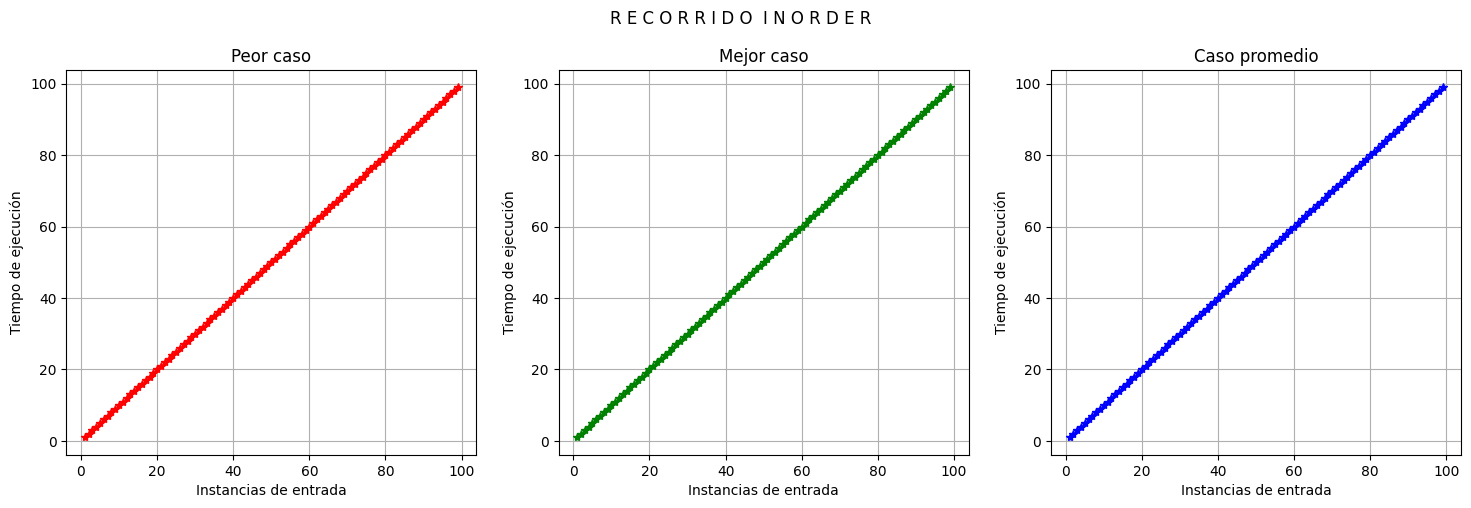

In [5]:
def graphInorder():
    global contInorder

    yInorder = []

    TAM = 100
    x = [i for i in range(1, TAM)]

    for num in x:
        listaNodos = []
        arbol = BinaryTree()

        for j in range(num):
            listaNodos.append(j)
            arbol.insert(arbol.root, Node(j))

        contInorder = 0

        arbol.print_in(arbol.root, 0)
        yInorder.append(contInorder)
    
    fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(18,5))

    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]

    ax1.plot(x, yInorder, "r*")
    ax2.plot(x, yInorder, "g*")
    ax3.plot(x, yInorder, "b*")

    fig.suptitle("R E C O R R I D O  I N O R D E R", y = 1)
    ax1.set_title("Peor caso")
    ax2.set_title("Mejor caso")
    ax3.set_title("Caso promedio")

    ax1.set_xlabel("Instancias de entrada")
    ax1.set_ylabel("Tiempo de ejecución")

    ax2.set_xlabel("Instancias de entrada")
    ax2.set_ylabel("Tiempo de ejecución")

    ax3.set_xlabel("Instancias de entrada")
    ax3.set_ylabel("Tiempo de ejecución")

    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)

graphInorder()

0 -> 
1 -> 
0 -> 
2 -> 
1 -> 
0 -> 
3 -> 
2 -> 
1 -> 
0 -> 
4 -> 
3 -> 
2 -> 
1 -> 
0 -> 
5 -> 
4 -> 
3 -> 
2 -> 
1 -> 
0 -> 
6 -> 
5 -> 
4 -> 
3 -> 
2 -> 
1 -> 
0 -> 
7 -> 
6 -> 
5 -> 
4 -> 
3 -> 
2 -> 
1 -> 
0 -> 
8 -> 
7 -> 
6 -> 
5 -> 
4 -> 
3 -> 
2 -> 
1 -> 
0 -> 
9 -> 
8 -> 
7 -> 
6 -> 
5 -> 
4 -> 
3 -> 
2 -> 
1 -> 
0 -> 
10 -> 
9 -> 
8 -> 
7 -> 
6 -> 
5 -> 
4 -> 
3 -> 
2 -> 
1 -> 
0 -> 
11 -> 
10 -> 
9 -> 
8 -> 
7 -> 
6 -> 
5 -> 
4 -> 
3 -> 
2 -> 
1 -> 
0 -> 
12 -> 
11 -> 
10 -> 
9 -> 
8 -> 
7 -> 
6 -> 
5 -> 
4 -> 
3 -> 
2 -> 
1 -> 
0 -> 
13 -> 
12 -> 
11 -> 
10 -> 
9 -> 
8 -> 
7 -> 
6 -> 
5 -> 
4 -> 
3 -> 
2 -> 
1 -> 
0 -> 
14 -> 
13 -> 
12 -> 
11 -> 
10 -> 
9 -> 
8 -> 
7 -> 
6 -> 
5 -> 
4 -> 
3 -> 
2 -> 
1 -> 
0 -> 
15 -> 
14 -> 
13 -> 
12 -> 
11 -> 
10 -> 
9 -> 
8 -> 
7 -> 
6 -> 
5 -> 
4 -> 
3 -> 
2 -> 
1 -> 
0 -> 
16 -> 
15 -> 
14 -> 
13 -> 
12 -> 
11 -> 
10 -> 
9 -> 
8 -> 
7 -> 
6 -> 
5 -> 
4 -> 
3 -> 
2 -> 
1 -> 
0 -> 
17 -> 
16 -> 
15 -> 
14 -> 
13 -> 
12 -> 
11 -> 
10 ->

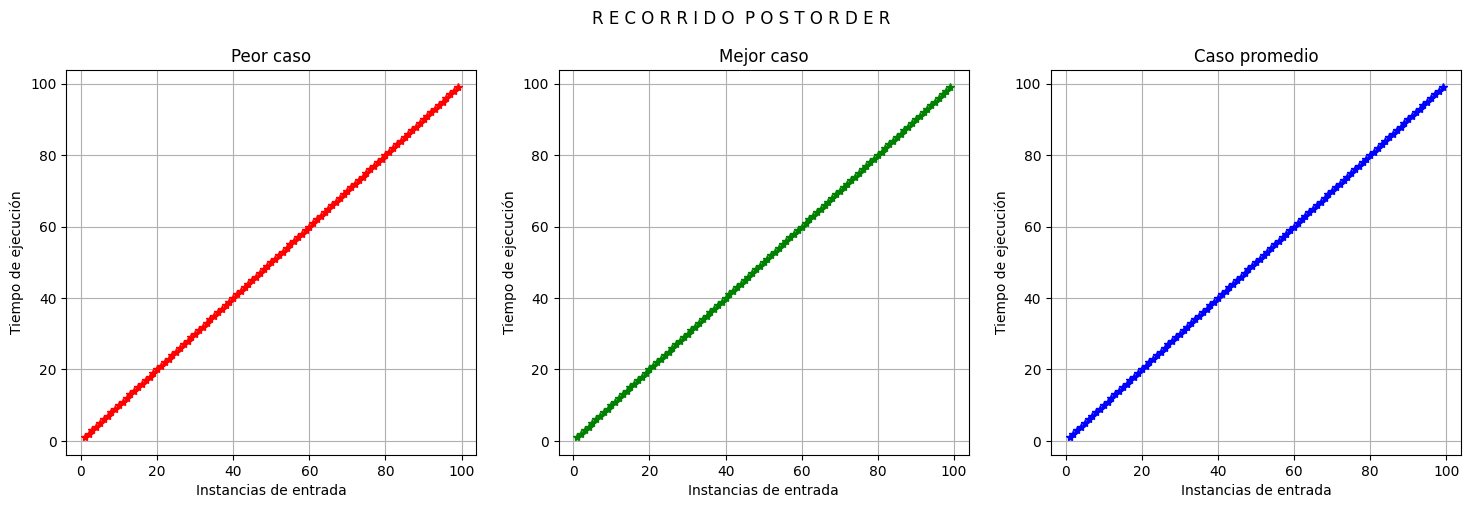

In [6]:
def graphPostorder():
    global contPostorder

    yPosorder = []

    TAM = 100
    x = [i for i in range(1, TAM)]

    for num in x:
        listaNodos = []
        arbol = BinaryTree()

        for j in range(num):
            listaNodos.append(j)
            arbol.insert(arbol.root, Node(j))

        contPostorder = 0

        arbol.print_post(arbol.root)
        yPosorder.append(contPostorder)
    
    fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(18,5))

    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]

    ax1.plot(x, yPosorder, "r*")
    ax2.plot(x, yPosorder, "g*")
    ax3.plot(x, yPosorder, "b*")

    fig.suptitle("R E C O R R I D O  P O S T O R D E R", y = 1)
    ax1.set_title("Peor caso")
    ax2.set_title("Mejor caso")
    ax3.set_title("Caso promedio")

    ax1.set_xlabel("Instancias de entrada")
    ax1.set_ylabel("Tiempo de ejecución")

    ax2.set_xlabel("Instancias de entrada")
    ax2.set_ylabel("Tiempo de ejecución")

    ax3.set_xlabel("Instancias de entrada")
    ax3.set_ylabel("Tiempo de ejecución")

    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)

graphPostorder()

0 -> 
0 -> 
1 -> 
0 -> 
1 -> 
2 -> 
0 -> 
1 -> 
2 -> 
3 -> 
0 -> 
1 -> 
2 -> 
3 -> 
4 -> 
0 -> 
1 -> 
2 -> 
3 -> 
4 -> 
5 -> 
0 -> 
1 -> 
2 -> 
3 -> 
4 -> 
5 -> 
6 -> 
0 -> 
1 -> 
2 -> 
3 -> 
4 -> 
5 -> 
6 -> 
7 -> 
0 -> 
1 -> 
2 -> 
3 -> 
4 -> 
5 -> 
6 -> 
7 -> 
8 -> 
0 -> 
1 -> 
2 -> 
3 -> 
4 -> 
5 -> 
6 -> 
7 -> 
8 -> 
9 -> 
0 -> 
1 -> 
2 -> 
3 -> 
4 -> 
5 -> 
6 -> 
7 -> 
8 -> 
9 -> 
10 -> 
0 -> 
1 -> 
2 -> 
3 -> 
4 -> 
5 -> 
6 -> 
7 -> 
8 -> 
9 -> 
10 -> 
11 -> 
0 -> 
1 -> 
2 -> 
3 -> 
4 -> 
5 -> 
6 -> 
7 -> 
8 -> 
9 -> 
10 -> 
11 -> 
12 -> 
0 -> 
1 -> 
2 -> 
3 -> 
4 -> 
5 -> 
6 -> 
7 -> 
8 -> 
9 -> 
10 -> 
11 -> 
12 -> 
13 -> 
0 -> 
1 -> 
2 -> 
3 -> 
4 -> 
5 -> 
6 -> 
7 -> 
8 -> 
9 -> 
10 -> 
11 -> 
12 -> 
13 -> 
14 -> 
0 -> 
1 -> 
2 -> 
3 -> 
4 -> 
5 -> 
6 -> 
7 -> 
8 -> 
9 -> 
10 -> 
11 -> 
12 -> 
13 -> 
14 -> 
15 -> 
0 -> 
1 -> 
2 -> 
3 -> 
4 -> 
5 -> 
6 -> 
7 -> 
8 -> 
9 -> 
10 -> 
11 -> 
12 -> 
13 -> 
14 -> 
15 -> 
16 -> 
0 -> 
1 -> 
2 -> 
3 -> 
4 -> 
5 -> 
6 -> 
7 -> 
8 -> 


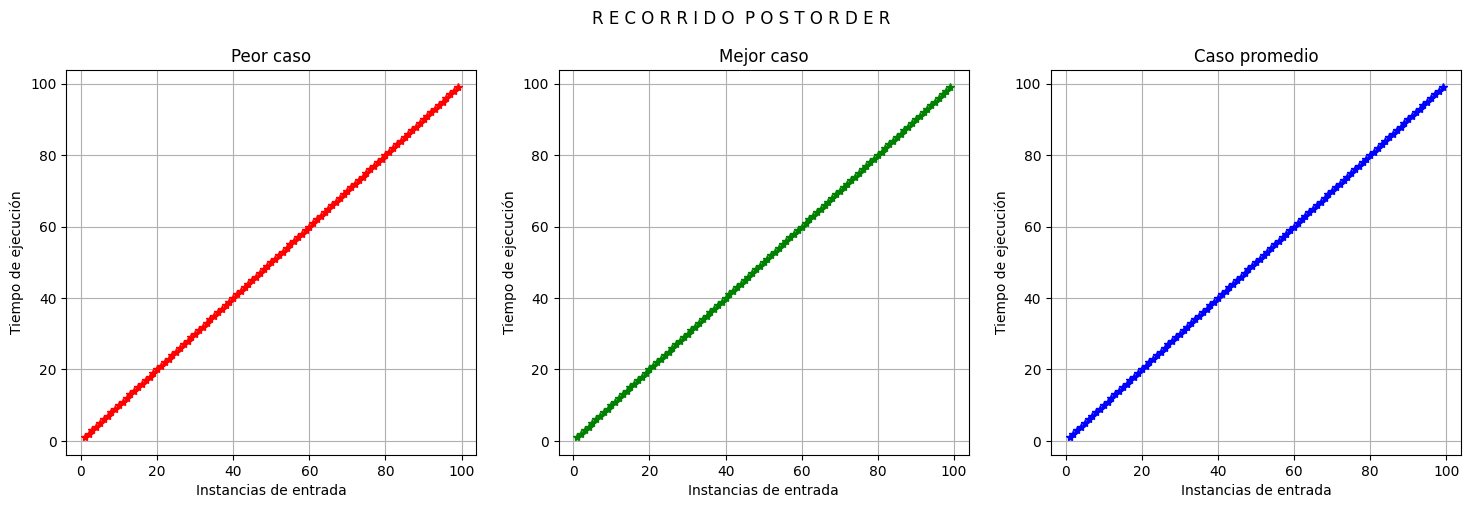

In [7]:
def graphPreorder():
    global contPreorder

    yPreorder = []

    TAM = 100
    x = [i for i in range(1, TAM)]

    for num in x:
        listaNodos = []
        arbol = BinaryTree()

        for j in range(num):
            listaNodos.append(j)
            arbol.insert(arbol.root, Node(j))

        contPreorder = 0

        arbol.print_pre(arbol.root)
        yPreorder.append(contPreorder)
    
    fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(18,5))

    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]

    ax1.plot(x, yPreorder, "r*")
    ax2.plot(x, yPreorder, "g*")
    ax3.plot(x, yPreorder, "b*")

    fig.suptitle("R E C O R R I D O  P O S T O R D E R", y = 1)
    ax1.set_title("Peor caso")
    ax2.set_title("Mejor caso")
    ax3.set_title("Caso promedio")

    ax1.set_xlabel("Instancias de entrada")
    ax1.set_ylabel("Tiempo de ejecución")

    ax2.set_xlabel("Instancias de entrada")
    ax2.set_ylabel("Tiempo de ejecución")

    ax3.set_xlabel("Instancias de entrada")
    ax3.set_ylabel("Tiempo de ejecución")

    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)

graphPreorder()